In [529]:
import pandas as pd
import os

In [530]:
os.listdir()

['.ipynb_checkpoints',
 'categories.csv',
 'category_mapping.xlsx',
 'glove.6B.100d.txt',
 'glove.6B.300d.txt',
 'news_classification.ipynb',
 'news_classification.zip',
 'news_classification_final.ipynb',
 'news_details.xlsx',
 'README.txt',
 '__MACOSX']

In [531]:
# reading the input files

categories = pd.read_csv('categories.csv')
category_mapping = pd.read_excel('category_mapping.xlsx')
news_details = pd.read_excel('news_details.xlsx')


# examining input files

In [532]:
print('categories df')
print( categories)


categories df
   id                    category
0   1                      Layoff
1   2    Mergers and Acquisitions
2   3                 Mass Hiring
3   4          Executive Movement
4   5  Centre Setup and Expansion
5   6                       Deals
6   7                Partnerships


In [533]:
print('category_mapping.info()---->')
print( category_mapping.info()) 

category_mapping.info()---->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 2 columns):
news_id        3544 non-null object
category_id    3544 non-null int64
dtypes: int64(1), object(1)
memory usage: 55.5+ KB
None


In [534]:
print('category_mapping.head()')
print(category_mapping.head())

category_mapping.head()
                           news_id  category_id
0  5cb377684f646938b14a96f1_google            4
1  5cb426d44f646938b10bf6b6_google            4
2  5cb429984f646938b110f937_google            2
3  5cb426b34f646938b10bbeca_google            5
4  5cb426f74f646938b10c3857_google            7


In [535]:
#checking for duplicates information 

print('total len of data',len(category_mapping))
print('after removing duplicates', len(category_mapping.drop_duplicates()))
# per news_id duplicate rows count
category_mapping_count = category_mapping.groupby(['news_id']).agg({'category_id':{'Count':'count'}}).sort_values(by = ('category_id', 'Count'),ascending = False)
print(category_mapping_count.head())
# dropping duplicates from training data
category_mapping = category_mapping.drop_duplicates()

total len of data 3544
after removing duplicates 2636


D:\Development_Avecto\Anaconda3\envs\sudeepenv\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


                                category_id
                                      Count
news_id                                    
5cb8a81e4f646938b1f37471_google           4
5cb6c85f4f646938b122c181_google           4
5ccded8c4eeb7f88115da426_google           3
5cc3cb15885ddf4b701481f8_google           3
5cb898874f646938b1d825fb_google           3


In [536]:
# mreging category with category_mapping
categories = categories.rename(columns = {'id':'category_id'})
categories_with_names = pd.merge(categories,
                 category_mapping[[ 'news_id','category_id']],
                 on='category_id')
print(len(categories_with_names))
categories_with_names.head()

2636


category_id category                          news_id
0            1   Layoff  5cb516014f646938b1bda75b_google
1            1   Layoff  5cb42d064f646938b1178e03_google
2            1   Layoff  5cb419f44f646938b1f851de_google
3            1   Layoff  5cb6bbcc4f646938b10fe4b8_google
4            1   Layoff  5cb6c3234f646938b1199b88_google

# examine news_details

In [537]:
news_details.head()

news_id  \
0  5cb377684f646938b14a96f1_google   
1  5cb426d44f646938b10bf6b6_google   
2  5cb429984f646938b110f937_google   
3  5cb426b34f646938b10bbeca_google   
4  5cb426f74f646938b10c3857_google   

                                             snippet  \
0  New Delhi: Bank of Baroda, which has become th...   
1  He said his plans would be discussed with the ...   
2  ZF Friedrichshafen AG has announced that it ha...   
3  Zhejiang Geely Holding (ZGH) has begun constru...   
4  KFH has partnered with IDEMIA to launch Kuwait...   

                                               title  \
0  Bank of Baroda to hire consultancy firm to eva...   
1  Foxconn chairman Gou says he aims to step down...   
2   ZF Finalizes USD 7 Billion Deal to Acquire WABCO   
3      Geely Begins Work On New Lotus Plant In China   
4  KFH partners with IDEMIA's to launch metal pay...   

                                    news_description  
0                                                NaN  
1  TAIPEI (Reuters) - The chairman of Taiwan's Fo...  
2  Share 0 Share 0\n\nZF Friedrichshafen AG has a...  
3  Zhejiang Geely Holding (ZGH) has begun constru...  
4                                                NaN

In [538]:
print('total len of news_details',len(news_details))
print('non duplicate len of news_details ',len(news_details.drop_duplicates()))
unique_news_details  = news_details.drop_duplicates()

total len of news_details 3544
non duplicate len of news_details  2720


In [539]:
print('len of news with categories',len(categories_with_names))
print('len of news with tags and snippet',len(unique_news_details))

len of news with categories 2636
len of news with tags and snippet 2720


In [540]:
categories_with_names.info(),unique_news_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2636 entries, 0 to 2635
Data columns (total 3 columns):
category_id    2636 non-null int64
category       2636 non-null object
news_id        2636 non-null object
dtypes: int64(1), object(2)
memory usage: 82.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2720 entries, 0 to 3541
Data columns (total 4 columns):
news_id             2720 non-null object
snippet             2715 non-null object
title               2720 non-null object
news_description    2534 non-null object
dtypes: object(4)
memory usage: 106.2+ KB


(None, None)

In [541]:
# mreging the unique_news_details with categories_with_names to get unified table

final_data = pd.merge(categories_with_names,unique_news_details,on  = 'news_id')

print('len(final_data)',len(final_data))

len(final_data) 2721


In [542]:

final_data.head()


category_id category                          news_id  \
0            1   Layoff  5cb516014f646938b1bda75b_google   
1            1   Layoff  5cb42d064f646938b1178e03_google   
2            1   Layoff  5cb419f44f646938b1f851de_google   
3            1   Layoff  5cb6bbcc4f646938b10fe4b8_google   
4            1   Layoff  5cb6c3234f646938b1199b88_google   

                                             snippet  \
0  The Finnish branch of management consulting gi...   
1  Kimberly-Clark is a US-owned corporation with ...   
2  ResCare Community Living, a BrightSpring Healt...   
3  PITTSBURGH - HM Health Solutions, an IT compan...   
4  Driven by new CEO Matt Comyn, who was appointe...   

                                               title  \
0       Accenture to slash up to 200 jobs in Finland   
1  Australia: Kimberly-Clark to shut Ingleburn pl...   
2  ResCare Community Living Downsizing In Kentuck...   
3  PITTSBURGH BUSINESS TIMES: Highmark Health sub...   
4  Commonwealth Bank working with McKinsey on mas...   

                                    news_description  
0  Image: Juha-Matti M\xe4ntyl\xe4 / Yle\n\nThe F...  
1  Australia: Kimberly-Clark to shut Ingleburn pl...  
2  ResCare Community Living, a BrightSpring Healt...  
3  Sign in using you account with: {* loginWidget...  
4  The Commonwealth Bank could be set to cut up t...

In [543]:
# selecting useful columns
data = final_data[['title','snippet','news_description','category']]

In [544]:
data.head()

title  \
0       Accenture to slash up to 200 jobs in Finland   
1  Australia: Kimberly-Clark to shut Ingleburn pl...   
2  ResCare Community Living Downsizing In Kentuck...   
3  PITTSBURGH BUSINESS TIMES: Highmark Health sub...   
4  Commonwealth Bank working with McKinsey on mas...   

                                             snippet  \
0  The Finnish branch of management consulting gi...   
1  Kimberly-Clark is a US-owned corporation with ...   
2  ResCare Community Living, a BrightSpring Healt...   
3  PITTSBURGH - HM Health Solutions, an IT compan...   
4  Driven by new CEO Matt Comyn, who was appointe...   

                                    news_description category  
0  Image: Juha-Matti M\xe4ntyl\xe4 / Yle\n\nThe F...   Layoff  
1  Australia: Kimberly-Clark to shut Ingleburn pl...   Layoff  
2  ResCare Community Living, a BrightSpring Healt...   Layoff  
3  Sign in using you account with: {* loginWidget...   Layoff  
4  The Commonwealth Bank could be set to cut up t...   Layoff

In [545]:
# just to see what stopwords we should remove in order to get clean data in 'title' column
for i in range(5):
    print(data.iloc[i]['title'])
    print("\n")
#     print(str(data.iloc[i]['snippet']))
#     print("\n\n\n")

Accenture to slash up to 200 jobs in Finland


Australia: Kimberly-Clark to shut Ingleburn plant and axe over 200 jobs.


ResCare Community Living Downsizing In Kentucky Due To Certification Challenge & Contract Loss | OPEN MINDS


PITTSBURGH BUSINESS TIMES: Highmark Health subsidiary lays off 239 employees \u2014 more than half in Pittsburgh


Commonwealth Bank working with McKinsey on massive job cuts




In [546]:
def is_nan(x):
    return isinstance(x, float) and math.isnan(x)

In [547]:
# regex has been used to remove 
import re,math
def preprocessing(data,col):
    processed_list = []
    cand_regex = "\.\.\.|\(.*\)|\{.*\}|\[.*\]|\\d*|\\d*\%|\$|\/|\+|::|:|,|\.|\||'|\\n|[\(!]|\""
    for i in range(len(data)):
#         print(i)
        x = data.iloc[i][col]
#         print(x)
        if is_nan(x):
            processed_list.append('')
            continue
        word_list = []
        for word in x.split():
            word = word.replace('\\xa', '')
            word = word.replace('\\u', '')
            word_list.append(word)
#             if re.search('\\\\(xa|u).*',word)==None:
#                 word_list.append(word)
        cand_string = ' '.join(word_list)
        cand_string = re.sub(cand_regex,'',cand_string)
        cand_string = re.sub('\+|@|:|\%|\$|\&|\|,|\.','',cand_string)
        cand_string = cand_string.replace('/', '')
        cand_string = cand_string.replace(';', '')
        cand_string = cand_string.replace('#', '')
        cand_string = cand_string.replace("'", '')
        cand_string = cand_string.replace('"', '')
        cand_string = cand_string.replace('|', '')
        cand_string = cand_string.replace('!', '')
        cand_string = cand_string.replace('\\n', ' ')
        cand_string = cand_string.replace(',', ' ')
        cand_string = cand_string.replace('-', ' ')
        cand_string = cand_string.replace('\\x', '')
        cand_string = cand_string.replace('\\r', ' ')
#         cand_string = re.sub('\\x','',cand_string)
        processed_list.append(cand_string)
    return processed_list
 
    
# due to power computation limit i have tried it to run on 2 different system, because of some difference in version i had to write regex as above.

In [548]:
data.head()

title  \
0       Accenture to slash up to 200 jobs in Finland   
1  Australia: Kimberly-Clark to shut Ingleburn pl...   
2  ResCare Community Living Downsizing In Kentuck...   
3  PITTSBURGH BUSINESS TIMES: Highmark Health sub...   
4  Commonwealth Bank working with McKinsey on mas...   

                                             snippet  \
0  The Finnish branch of management consulting gi...   
1  Kimberly-Clark is a US-owned corporation with ...   
2  ResCare Community Living, a BrightSpring Healt...   
3  PITTSBURGH - HM Health Solutions, an IT compan...   
4  Driven by new CEO Matt Comyn, who was appointe...   

                                    news_description category  
0  Image: Juha-Matti M\xe4ntyl\xe4 / Yle\n\nThe F...   Layoff  
1  Australia: Kimberly-Clark to shut Ingleburn pl...   Layoff  
2  ResCare Community Living, a BrightSpring Healt...   Layoff  
3  Sign in using you account with: {* loginWidget...   Layoff  
4  The Commonwealth Bank could be set to cut up t...   Layoff

In [549]:
data.iloc[0]['news_description']

'Image: Juha-Matti M\\xe4ntyl\\xe4 / Yle\\n\\nThe Finnish branch of management consulting giant Accenture has plans to cut its workforce in the country by up to 200 employees.\\n\\nThe company said it\'s downsizing in order to meet a rapidly-changing operating environment.\\n\\nAccenture Finland management is scheduled to begin employer-employee negotiations with worker reps on 24 April.\\n\\nThe company currently employs around 1,200 people in Finland. Globally, there were nearly 450,000 employees working at Accenture as of last year.\\n\\nThe firm\'s managing director in Finland, Frank Korsstr\\xf6m, said the company is committed to further developing its business in the country.\\n\\n"We will continue to recruit consultancy and technology experts to meet our customers\' demand," Korsstr\\xf6m said.'

In [550]:
# print(len())
preprocessed_data = pd.DataFrame()
preprocessed_data['title'] = preprocessing(data,'title')
preprocessed_data['snippet'] = preprocessing(data,'snippet')
preprocessed_data['news_description'] = preprocessing(data,'news_description')
preprocessed_data['category'] = data['category']


In [551]:
preprocessed_data.head()

title  \
0          Accenture to slash up to  jobs in Finland   
1  Australia Kimberly Clark to shut Ingleburn pla...   
2  ResCare Community Living Downsizing In Kentuck...   
3  PITTSBURGH BUSINESS TIMES Highmark Health subs...   
4  Commonwealth Bank working with McKinsey on mas...   

                                             snippet  \
0  The Finnish branch of management consulting gi...   
1  Kimberly Clark is a US owned corporation with ...   
2  ResCare Community Living  a BrightSpring Healt...   
3  PITTSBURGH   HM Health Solutions  an IT compan...   
4  Driven by new CEO Matt Comyn  who was appointe...   

                                    news_description category  
0  Image Juha Matti Mentyle  Yle  The Finnish bra...   Layoff  
1  Australia Kimberly Clark to shut Ingleburn pla...   Layoff  
2  ResCare Community Living  a BrightSpring Healt...   Layoff  
3  Sign in using you account with  Please check y...   Layoff  
4  The Commonwealth Bank could be set to cut up t...   Layoff

In [552]:
# checking the preprocessed data
for i in range( 4):
    print(preprocessed_data.iloc[i]['title'])

Accenture to slash up to  jobs in Finland
Australia Kimberly Clark to shut Ingleburn plant and axe over  jobs
ResCare Community Living Downsizing In Kentucky Due To Certification Challenge  Contract Loss  OPEN MINDS
PITTSBURGH BUSINESS TIMES Highmark Health subsidiary lays off  employees  more than half in Pittsburgh


#### we have got preprocessed data {removing all punctuations}

In [553]:
data.isnull().sum()

title                 0
snippet               5
news_description    186
category              0
dtype: int64

In [554]:
# now we will check the empty fields over the column 'title'
preprocessed_data[preprocessed_data['title']=='']
# every news have title

Empty DataFrame
Columns: [title, snippet, news_description, category]
Index: []

In [555]:
# now we will check the empty fields over the column 'snippet'
preprocessed_data[preprocessed_data['snippet']==''].count()
# 5 news do not contain 'snippet'

title               5
snippet             5
news_description    5
category            5
dtype: int64

In [556]:
# now we will check the empty fields over the column 'news_description'
preprocessed_data[preprocessed_data['news_description']==''].count()
# 197 news do not contain 'news_description'

title               197
snippet             197
news_description    197
category            197
dtype: int64

### so lets try to build model first on title

In [557]:
# nltk stop_words + custom_stop_words # FEW ADDED ONE (ENHANCED STOP_WORDS)
stop_words = set(["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"])
custom_stop_words = set(['#','&',';','?','@','a','aaid','aan','ab','abb','abc','ac','yy','~','zf'] + ['nj','f','w','ad','llc','plc','cmo','bn','bp','bb','vr','dr','sa','e','l','th','md','q','x','tc','ex','mw','hq','jv','ag','vp','ge','c','r'
'b','j','k','g','p','sk','sf','hp','st','ev','tc','r','b','g','u'])
stopWords = stop_words.union(custom_stop_words) 
print(len(stopWords))

1210


In [558]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
custom_stop_words = set(['#','&',';','?','@','a','aaid','aan','ab','abb','abc','ac','yy','~','zf'] + ['nj','f','w','ad','llc','plc','cmo','bn','bp','bb','vr','dr','sa','e','l','th','md','q','x','tc','ex','mw','hq','jv','ag','vp','ge','c','r'
'b','j','k','g','p','sk','sf','hp','st','ev','tc','r','b','g','u'])
# stopWords = set(stopwords.words('english')).union(custom_stop_words) 
stopWords = set(stop_words).union(custom_stop_words) 

from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


def nlp_preprocessing(x):
    
    # word_tokenization
    words = word_tokenize(x)
    #stop_words removal
    filtered_words = []
    for word in words:
        if word.lower() not in  stopWords:
            filtered_words.append(lemmatizer.lemmatize(word.lower()))
    return filtered_words
    

In [559]:
import spacy

In [560]:
training_data = preprocessed_data[['title','category']]


training_data['title'] = training_data['title'].apply(nlp_preprocessing)

D:\Development_Avecto\Anaconda3\envs\sudeepenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [561]:
# nltk.download('punkt')

In [562]:
training_data = training_data.sample(frac= 1)
training_data.head()

title  \
2131  [pcm, partner, ringcentral, bring, cloud, comm...   
1079  [office, depot, announces, stephen, mohan, exe...   
413          [bristol, myers, squibb, bm, nash, update]   
1135  [icici, bank, update, outcome, board, meeting,...   
682       [stryker, corporation, close, stock, gallery]   

                      category  
2131              Partnerships  
1079        Executive Movement  
413   Mergers and Acquisitions  
1135        Executive Movement  
682         Executive Movement

In [563]:
word_collections = list(training_data['title'])
flatten = lambda l: [item for list_ in word_collections for item in list_]
word_collections  = flatten(word_collections)

print(len(word_collections),len(set(word_collections)))

21194 5990


In [564]:

from collections import Counter
vocab = pd.DataFrame(word_collections,columns = ['words']).groupby('words').agg({'words':{'count':'count'}}).sort_values( by = ('words','count'),ascending =False)[:5000]
vocab = list(vocab.index)
# vocab = vocab.columns.rename({'(words, )':words})
# vocab['words, ']

D:\Development_Avecto\Anaconda3\envs\sudeepenv\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [565]:

len(vocab)

5000

# now we create feature matrix

In [566]:
training_data['title'] = training_data['title'].apply(lambda x :' '.join(x))

In [567]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [568]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(training_data['title'])
print(X.shape)
# vectorizer.get_feature_names()

(2721, 5000)


In [569]:
Y = training_data['category']
class_labels = sorted(list(Y.unique()))
dictionary ={ label : i for i,label in enumerate(class_labels) }
dictionary

{'Centre Setup and Expansion': 0,
 'Deals': 1,
 'Executive Movement': 2,
 'Layoff': 3,
 'Mass Hiring': 4,
 'Mergers and Acquisitions': 5,
 'Partnerships': 6}

In [570]:

class_label_list = []
for label in Y:
    class_label_list.append(dictionary[label])

In [571]:
class_label_list[:5]

[6, 2, 5, 2, 2]

In [572]:
Y[:5]

2131                Partnerships
1079          Executive Movement
413     Mergers and Acquisitions
1135          Executive Movement
682           Executive Movement
Name: category, dtype: object

In [573]:
training_data.head()

title  \
2131  pcm partner ringcentral bring cloud communicat...   
1079  office depot announces stephen mohan executive...   
413                 bristol myers squibb bm nash update   
1135       icici bank update outcome board meeting held   
682             stryker corporation close stock gallery   

                      category  
2131              Partnerships  
1079        Executive Movement  
413   Mergers and Acquisitions  
1135        Executive Movement  
682         Executive Movement

In [574]:
import numpy as np
x, y = X, np.array(class_label_list) 

In [575]:
x.shape,y.shape

((2721, 5000), (2721,))

In [576]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify = y,random_state=42)

In [577]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1823, 5000), (898, 5000), (1823,), (898,))

# lets build some basics models

In [578]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
y_predicted = clf.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
accuracy  = accuracy_score(y_test, y_predicted)
precision  = precision_score(y_test, y_predicted,average = 'weighted')
recall_score  = recall_score(y_test, y_predicted,average = 'weighted')
f1_score  = f1_score(y_test, y_predicted,average = 'weighted')
accuracy,precision,recall_score,f1_score

(0.80178173719376389,
 0.81087349868402514,
 0.80178173719376389,
 0.79010312372683678)

##### you can see that accuracy test accuracy using logistic model is 82.62 %

#####  

In [582]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=300,random_state=0).fit(X_train, y_train) 

y_predicted = clf.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
accuracy  = accuracy_score(y_test, y_predicted)
precision  = precision_score(y_test, y_predicted,average = 'weighted')
recall_score  = recall_score(y_test, y_predicted,average = 'weighted')
f1_score  = f1_score(y_test, y_predicted,average = 'weighted')
accuracy,precision,recall_score,f1_score

(0.82516703786191536,
 0.83013094122159592,
 0.82516703786191536,
 0.82522685847193966)

##### you can see that accuracy test accuracy using random forest model is 82.51 %

In [580]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_predicted = clf.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
accuracy  = accuracy_score(y_test, y_predicted)
precision  = precision_score(y_test, y_predicted,average = 'weighted')
recall_score  = recall_score(y_test, y_predicted,average = 'weighted')
f1_score  = f1_score(y_test, y_predicted,average = 'weighted')
accuracy,precision,recall_score,f1_score


(0.76503340757238303,
 0.77414680219489085,
 0.76503340757238303,
 0.76567765107179797)

##### you can see that accuracy test accuracy using decision tree model is 76.50 %

# going deeper with pretrained models

In [585]:
preprocessed_data = preprocessed_data.reset_index(drop = True)
preprocessed_data.head()
preprocessed_data['title_snippet'] = [preprocessed_data.iloc[i]['title'] + " "+ preprocessed_data.iloc[i]['snippet']  for i in range(len(preprocessed_data))] 
preprocessed_data['title_snippet_news_description'] = [preprocessed_data.iloc[i]['title'] + " "+ preprocessed_data.iloc[i]['snippet']+" "+preprocessed_data['news_description']  for i in range(len(preprocessed_data))] 


In [586]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 6 columns):
title                             2721 non-null object
snippet                           2721 non-null object
news_description                  2721 non-null object
category                          2721 non-null object
title_snippet                     2721 non-null object
title_snippet_news_description    2721 non-null object
dtypes: object(6)
memory usage: 127.6+ KB


####  preprocessed_data have multple columns , you can train model any of the ['title','snippet','news_description','title_snippet'].
after doing lot of tuning and all i found 'title_snippet' column which is combination of ['title','snippet'] giving the better scenerio. 

In [587]:
training_column = 'title_snippet'

In [588]:
training_data = preprocessed_data[[training_column,'category']]

In [589]:
training_data.head()

title_snippet category
0  Accenture to slash up to  jobs in Finland The ...   Layoff
1  Australia Kimberly Clark to shut Ingleburn pla...   Layoff
2  ResCare Community Living Downsizing In Kentuck...   Layoff
3  PITTSBURGH BUSINESS TIMES Highmark Health subs...   Layoff
4  Commonwealth Bank working with McKinsey on mas...   Layoff

In [590]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup


In [592]:
# vocab_size
MAX_NB_WORDS = 50000
# maximum size for each statement
MAX_SEQUENCE_LENGTH = 250
# time dimension
EMBEDDING_DIM = 100
#tokenization and punctuation removal
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(training_data[training_column].values)
word_index = tokenizer.word_index
print('Found %s unique words.' % len(word_index))

Found 10781 unique words.


In [593]:
X = tokenizer.texts_to_sequences(training_data[training_column].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data :', X.shape)

Shape of data : (2721, 250)


In [594]:

M = pd.get_dummies(training_data['category'])
Y = M.values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2721, 7)


In [595]:
M.head()

Centre Setup and Expansion  Deals  Executive Movement  Layoff  Mass Hiring  \
0                           0      0                   0       1            0   
1                           0      0                   0       1            0   
2                           0      0                   0       1            0   
3                           0      0                   0       1            0   
4                           0      0                   0       1            0   

   Mergers and Acquisitions  Partnerships  
0                         0             0  
1                         0             0  
2                         0             0  
3                         0             0  
4                         0             0

In [596]:
M.columns

Index(['Centre Setup and Expansion', 'Deals', 'Executive Movement', 'Layoff',
       'Mass Hiring', 'Mergers and Acquisitions', 'Partnerships'],
      dtype='object')

In [597]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2448, 250) (2448, 7)
(273, 250) (273, 7)


#### normal  lstm model without word embedding

In [601]:
# model architecture

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_14 (Spatia (None, 250, 100)          0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_17 (Dense)             (None, 7)                 707       
Total params: 5,081,107
Trainable params: 5,081,107
Non-trainable params: 0
_________________________________________________________________
None


In [608]:
epochs = 15
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,verbose = 2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 2203 samples, validate on 245 samples
Epoch 1/15
 - 11s - loss: 0.1291 - acc: 0.9628 - val_loss: 0.9615 - val_acc: 0.7469
Epoch 2/15
 - 11s - loss: 0.1139 - acc: 0.9682 - val_loss: 0.9921 - val_acc: 0.7388
Epoch 3/15
 - 11s - loss: 0.0908 - acc: 0.9755 - val_loss: 1.0673 - val_acc: 0.7469
Epoch 4/15
 - 11s - loss: 0.0893 - acc: 0.9778 - val_loss: 0.9488 - val_acc: 0.7510
Epoch 5/15
 - 11s - loss: 0.0742 - acc: 0.9809 - val_loss: 0.9409 - val_acc: 0.7347
Epoch 6/15
 - 11s - loss: 0.0636 - acc: 0.9846 - val_loss: 1.0492 - val_acc: 0.7673
Epoch 7/15
 - 11s - loss: 0.0604 - acc: 0.9900 - val_loss: 1.1405 - val_acc: 0.7551
Epoch 8/15
 - 11s - loss: 0.0473 - acc: 0.9882 - val_loss: 1.0407 - val_acc: 0.7551


In [610]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("simple_lstm_model.h5")
print("Saved model to disk")

Saved model to disk


In [609]:
accr = model.evaluate(X_test,Y_test)
print('accuracy over test set',accr[1])
accr

273/273 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 2ms/step
accuracy over test set 0.783882784319


[0.96256269814767248, 0.78388278431944791]

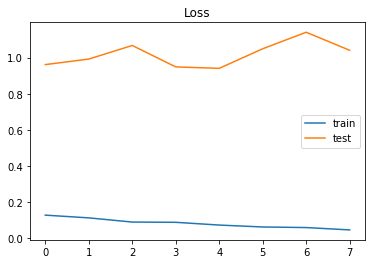

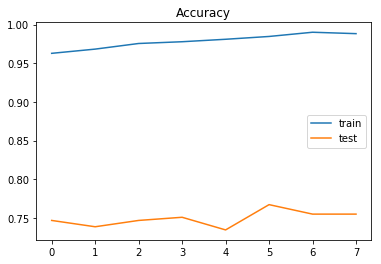

In [611]:



plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();


##### you can see that accuracy test accuracy using simple lstm model is 78.34 %

### now try word embedding with lstm

In [445]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [446]:
vocabulary_size = len(word_index)

In [447]:
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = word_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [448]:
## create model
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 100, input_length=250, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(LSTM(100))
model_glove.add(Dense(7, activation='softmax'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
## Fit train data
history = model_glove.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,verbose =2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 2203 samples, validate on 245 samples
Epoch 1/15
 - 10s - loss: 0.3533 - acc: 0.8671 - val_loss: 0.2899 - val_acc: 0.8857
Epoch 2/15
 - 9s - loss: 0.2681 - acc: 0.8953 - val_loss: 0.2440 - val_acc: 0.9032
Epoch 3/15
 - 9s - loss: 0.2362 - acc: 0.9088 - val_loss: 0.2213 - val_acc: 0.9137
Epoch 4/15
 - 9s - loss: 0.2045 - acc: 0.9198 - val_loss: 0.2023 - val_acc: 0.9283
Epoch 5/15
 - 9s - loss: 0.1872 - acc: 0.9275 - val_loss: 0.1896 - val_acc: 0.9312
Epoch 6/15
 - 9s - loss: 0.1749 - acc: 0.9332 - val_loss: 0.1646 - val_acc: 0.9376
Epoch 7/15
 - 9s - loss: 0.1559 - acc: 0.9415 - val_loss: 0.1679 - val_acc: 0.9399
Epoch 8/15
 - 9s - loss: 0.1526 - acc: 0.9417 - val_loss: 0.1616 - val_acc: 0.9458
Epoch 9/15
 - 9s - loss: 0.1360 - acc: 0.9501 - val_loss: 0.1640 - val_acc: 0.9364
Epoch 10/15
 - 9s - loss: 0.1360 - acc: 0.9484 - val_loss: 0.1634 - val_acc: 0.9429
Epoch 11/15
 - 9s - loss: 0.1267 - acc: 0.9514 - val_loss: 0.1351 - val_acc: 0.9510
Epoch 12/15
 - 9s - loss: 0.1133 - ac

In [612]:
model_json = model_glove.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_glove.save_weights("word_embedding_lstm_model.h5")
print("Saved model to disk")

Saved model to disk


In [452]:
accr = model_glove.evaluate(X_test,Y_test)
# print('accuracy over test set',a)
accr

273/273 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 2ms/step


[0.14042620998107908, 0.95081111341169033]

273/273 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 2ms/step
accuracy over test set 0.950811113412


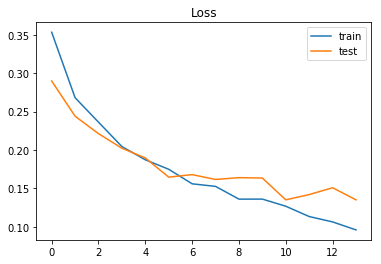

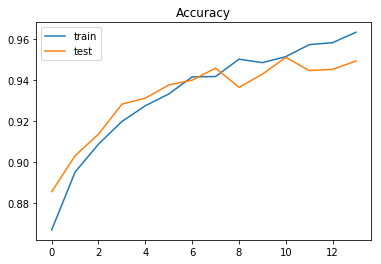

In [450]:


plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

#### you can see that accuracy test accuracy using WORD_EMBEDDED LSTM  model is 95.08 %

In [453]:
def prediction_preprocessing(input_str):
    
    cand_regex = "\.\.\.|\(.*\)|\{.*\}|\[.*\]|\\d*|\\d*\%|\$|\/|\+|::|:|,|\.|\||'|\\n|[\(!]|\""
    x = input_str
    word_list = []
    for word in x.split():
        word = word.replace('\\xa', '')
        word = word.replace('\\u', '')
        word_list.append(word)
    cand_string = ' '.join(word_list)
    cand_string = re.sub(cand_regex,'',cand_string)
    cand_string = re.sub('\+|@|:|\%|\$|\&|\|,|\.','',cand_string)
    cand_string = cand_string.replace('/', '')
    cand_string = cand_string.replace(';', '')
    cand_string = cand_string.replace("'", '')
    cand_string = cand_string.replace('"', '')
    cand_string = cand_string.replace('|', '')
    cand_string = cand_string.replace('#', '')
    cand_string = cand_string.replace('!', '')
    cand_string = cand_string.replace('\\n', ' ')
    cand_string = cand_string.replace(',', ' ')
    cand_string = cand_string.replace('-', ' ')
    cand_string = cand_string.replace('\\x', '')
    cand_string = cand_string.replace('\\r', ' ')
    return cand_string
 

In [454]:
input_str = 'Accenture to slash up to  jobs in Finland The Finnish branch of management consulting giant Accenture has plans to cut its workforce in the country by up to  employees The company said its'



In [459]:
preprocessed_data.head()

title  \
0          Accenture to slash up to  jobs in Finland   
1  Australia Kimberly Clark to shut Ingleburn pla...   
2  ResCare Community Living Downsizing In Kentuck...   
3  PITTSBURGH BUSINESS TIMES Highmark Health subs...   
4  Commonwealth Bank working with McKinsey on mas...   

                                             snippet  \
0  The Finnish branch of management consulting gi...   
1  Kimberly Clark is a US owned corporation with ...   
2  ResCare Community Living  a BrightSpring Healt...   
3  PITTSBURGH   HM Health Solutions  an IT compan...   
4  Driven by new CEO Matt Comyn  who was appointe...   

                                    news_description category  \
0  Image Juha Matti Mentyle  Yle  The Finnish bra...   Layoff   
1  Australia Kimberly Clark to shut Ingleburn pla...   Layoff   
2  ResCare Community Living  a BrightSpring Healt...   Layoff   
3  Sign in using you account with  Please check y...   Layoff   
4  The Commonwealth Bank could be set to cut up t...   Layoff   

                                       title_snippet  \
0  Accenture to slash up to  jobs in Finland The ...   
1  Australia Kimberly Clark to shut Ingleburn pla...   
2  ResCare Community Living Downsizing In Kentuck...   
3  PITTSBURGH BUSINESS TIMES Highmark Health subs...   
4  Commonwealth Bank working with McKinsey on mas...   

                      title_snippet_news_description  
0  0       Accenture to slash up to  jobs in Finl...  
1  0       Australia Kimberly Clark to shut Ingle...  
2  0       ResCare Community Living Downsizing In...  
3  0       PITTSBURGH BUSINESS TIMES Highmark Hea...  
4  0       Commonwealth Bank working with McKinse...

In [583]:
def prediction_function(input_str):
    preprocessed_str = prediction_preprocessing(input_str)
    word_list = nlp_preprocessing(preprocessed_str.strip())
    str_ = [' '.join(word_list)]
#     print(str_)
    seq = tokenizer.texts_to_sequences(str_)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
#     print(padded.shape)
    pred = model_glove.predict(padded)
#     print(pred)
    labels = ['Centre Setup and Expansion', 'Deals', 'Executive Movement', 'Layoff',
       'Mass Hiring', 'Mergers and Acquisitions', 'Partnerships']
    print(input_str,'--PREDICTED AS--',labels[np.argmax(pred)])
    return labels[np.argmax(pred)]

In [617]:
input_str = 'PITTSBURGH BUSINESS TIMES Highmark Health subsidiary lays off  employees  more than half in Pittsburgh PITTSBURGH   HM Health Solutions  an IT company owned by Highmark Health  laid off  employees  including  in Pittsburgh Highmark Health'
predicted_label = prediction_function(input_str)

PITTSBURGH BUSINESS TIMES Highmark Health subsidiary lays off  employees  more than half in Pittsburgh PITTSBURGH   HM Health Solutions  an IT company owned by Highmark Health  laid off  employees  including  in Pittsburgh Highmark Health --PREDICTED AS-- Layoff


#### we have seen in all model we have implemented such as logistic regression, random_forest, decision_tree, simple lstm model and at last lstm with word_embedding, word_embedding lstm model performed well which makes sense because it considers the semantic meaning of words.